In [1]:
import pandas as pd

data = pd.read_csv('datasets/car-prices.csv')
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
to_change = {
    'no' : 0,
    'yes' : 1
}

data.sold = data.sold.map(to_change)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [3]:
from datetime import datetime

current_year = datetime.today().year
data['model_age'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


Esses `1.60934` foram obtidos no Google.

In [5]:
data['km_per_year'] = data.mileage_per_year * 1.60934
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [7]:
data = data.drop(columns = ['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1)
data.head()

,price,sold,model_age,km_per_year
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [10]:
x = data[['price', 'model_age', 'km_per_year']]
y = data.sold

In [11]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify = y)
print('Treino x: %d\nTeste x: %d\n\nTreino y: %d\nTeste y: %d' % (len(train_x), len(test_x), len(train_y), len(test_y)))

model = LinearSVC()
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy = accuracy_score(test_y, predicts)
print('A acurácia foi de %.2f%%' % (accuracy * 100))

Treino x: 7500
Teste x: 2500

Treino y: 7500
Teste y: 2500
A acurácia foi de 47.28%


/home/weverton/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


`DummyClassifier` é um modelo de classificação fictício usado como uma referência básica para avaliar a performance dos modelos de classificação.

Aqui, além do `DummyClassifier`, foi apresentado o método `sklearn.score` que  que já dá a acurácia sem ter que ficar fazendo importações adicionais.

In [21]:
from sklearn.dummy import DummyClassifier

dummy_prior = DummyClassifier()
dummy_prior.fit(train_x, train_y)
accuracy = dummy_prior.score(test_x, test_y)
print('A acurácia do dummy_prior foi de %.2f%%' % (accuracy * 100))

A acurácia do dummy_prior foi de 58.00%


No curso, nesta parte é ensinado a opção `stratified` para o parâmetro `strategy`, porém este parâmetro é similar ao `prior` (opção padrão), inclusive retornando a mesma acurácia dele. Diante disto, optei por usar neste exercício, o `stratified` que era a opção padrão na época em que o curso foi gravado, sendo assim, a ondem dos exercícios, ficou invertida.

In [22]:
dummy_stratified = DummyClassifier(strategy = 'stratified')

dummy_stratified.fit(train_x, train_y)
accuracy = dummy_stratified.score(test_x, test_y)
print('A acurácia do dummy_stratified foi de %.2f%%' % (accuracy * 100))

A acurácia do dummy_stratified foi de 51.56%


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify = y)
print('Treino x: %d\nTeste x: %d\n\nTreino y: %d\nTeste y: %d' % (len(train_x), len(test_x), len(train_y), len(test_y)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC(gamma='auto')
model.fit(train_x, train_y)
accuracy = model.score(test_x, test_y)
print('A acurácia foi de %.2f%%' % (accuracy * 100))

Treino x: 7500
Teste x: 2500

Treino y: 7500
Teste y: 2500
A acurácia foi de 77.48%


# Árvore de Decisão

Com o `DecisionTreeClassifier` é possível visualizar o motivo de determinada previsão. Aqui os nós (`max_depth`) foram limitados em 3 para facilitar a visualização no gráfico abaixo.

Classificadores árvore de decisão não precisa que os valores sejam escalados para funcionar.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify = y)
print('Treino x: %d\nTeste x: %d\n\nTreino y: %d\nTeste y: %d' % (len(train_x), len(test_x), len(train_y), len(test_y)))

model = DecisionTreeClassifier(max_depth = 3)
model.fit(raw_train_x, train_y)
accuracy = model.score(raw_test_x, test_y)
print('A acurácia foi de %.2f%%' % (accuracy * 100))

Treino x: 7500
Teste x: 2500

Treino y: 7500
Teste y: 2500
A acurácia foi de 79.28%


`graphviz` também precisa ser instalado na máquina. 

`samples` É a quantidade de dados analisados em cada nó.

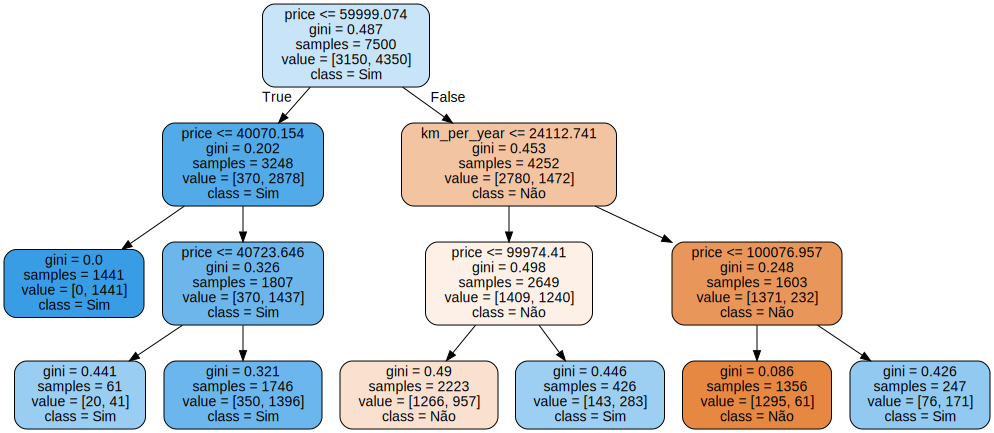

In [39]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names = features, filled=True, rounded=True, class_names = ['Não', 'Sim'])
graph = graphviz.Source(dot_data)
graph